# Sales Analysis

## *Table of Contents*
#### 1.Import Necessary Libraries
#### 2.Question 1:What was the best month for sales? How much was earned that month?
#### 3.Question 2:What city sold the most product?
#### 4.Question 3:What time should we display advertisemens to maximize the likelihood of customer’s buying product?
#### 5.Question 4 : What products are most often sold together?
#### 6.Question 5:What product sold the most? Why do you think it sold the most?

### Import Necessary Libraries

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt


#### Read dataframe

In [2]:
df = pd.read_csv('./Sales Data.csv')
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.isna().sum() #shows that there are no null values

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [5]:
# Let's use .apply()
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)}({get_state(x)})")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City(NY),0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City(NY),7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City(NY),18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco(CA),15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta(GA),12


#### Question 1:What was the best month for sales? How much was earned that month?

In [6]:
results = df.groupby('Month').sum()

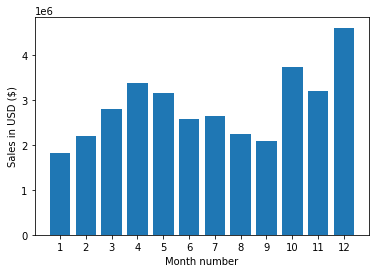

In [7]:
months=range(1,13)

plt.bar(months,results['Sales'])
plt.xticks(months)
plt.xlabel("Month number")
plt.ylabel("Sales in USD ($)")
plt.show()


#### Question 2:What city sold the most product?

In [8]:
city_sales=df.groupby('City')['Sales'].sum().nlargest(5)
city_sales

City
 San Francisco(CA)    8262203.91
 Los Angeles(CA)      5452570.80
 New York City(NY)    4664317.43
 Boston(MA)           3661642.01
 Atlanta(GA)          2795498.58
Name: Sales, dtype: float64

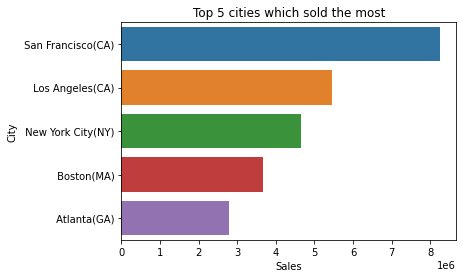

In [9]:
sns.barplot(y=city_sales.index,x=city_sales).set(title='Top 5 cities which sold the most' );

#### Question 3:What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [10]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [11]:
# Add hour column
df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour
df['Minute'] = pd.to_datetime(df['Order Date']).dt.minute
df['Count'] = 1
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City(NY),0,1,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City(NY),7,3,1
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City(NY),18,21,1
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco(CA),15,13,1
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta(GA),12,38,1


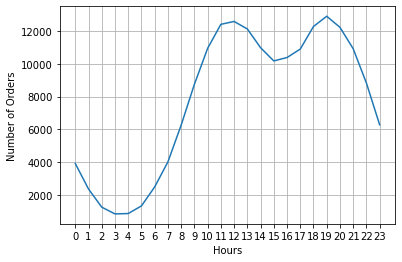

In [12]:
keys = [pair for pair, df in df.groupby(['Hour'])]

plt.plot(keys, df.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.show()

# My recommendation is slightly before 11am or 7pm

#### Question 4 : What products are most often sold together?

In [13]:
df1 = df[df['Order Date'].duplicated(keep=False)]

df1['Grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df1 = df1[['Order ID', 'Grouped']].drop_duplicates()
df1.head()

C:\Users\win10\AppData\Local\Temp\ipykernel_12608\3608777777.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
2,295667,USB-C Charging Cable
3,295668,27in FHD Monitor
4,295669,USB-C Charging Cable
9,295674,AAA Batteries (4-pack)
11,295676,ThinkPad Laptop


In [14]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df1['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Question 5:What product sold the most? Why do you think it sold the most?

In [15]:
product_group = df.groupby('Product')

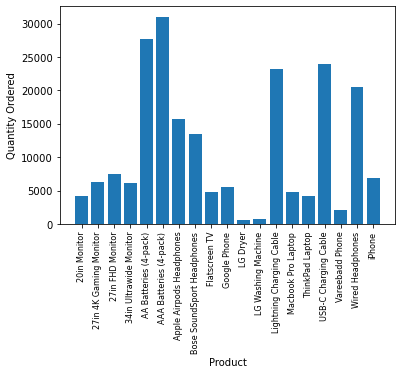

In [16]:
quantity_ordered =product_group.sum()['Quantity Ordered']

products = [product for product ,df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products,rotation='vertical',size=8)
plt.show()

C:\Users\win10\AppData\Local\Temp\ipykernel_12608\3129376150.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)
C:\Users\win10\AppData\Local\Temp\ipykernel_12608\3129376150.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


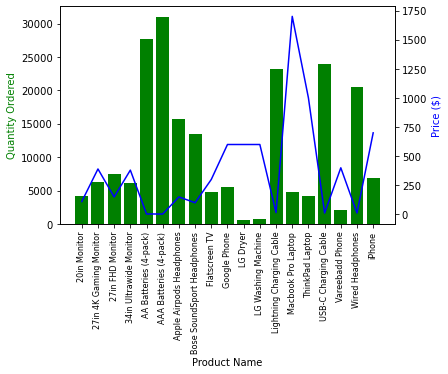

In [17]:
prices = df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products , prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()